In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from utils import *
from scipy.fft import fft

In [2]:
df = load_amb_sin_data("amb_sin/sine_fy_41Hz_0RPM.txt")

In [5]:
(df["datetime"] - df["datetime"].shift()).median().delta*1e-9

0.00019500000000000002

In [4]:
mean_dt = (df["datetime"] - df["datetime"].shift()).mean().delta*1e-9


In [5]:
for col in ['ax', 'ay', 'bx', 'by', 'f_ax', 'f_ay', 'f_bx', 'f_by']:
    df = append_derivatives_to_dataframe(df, col, dt=mean_dt)

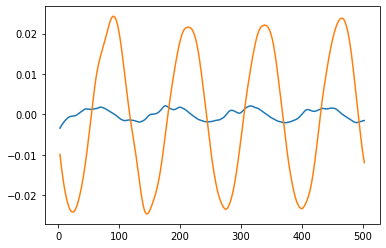

In [6]:
plt.plot(df["ax_dot"].iloc[:500])
plt.plot(df["ay_dot"].iloc[:500])

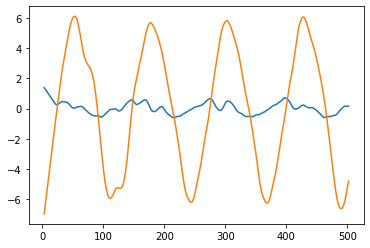

In [7]:
plt.plot(df["ax_dot2"].iloc[:500])
plt.plot(df["ay_dot2"].iloc[:500])

In [8]:
df[[col for col in df.columns if "ax" in col]]

,ax,f_ax,ax_dot,ax_dot2,f_ax_dot,f_ax_dot2
3,1.082130e-06,0.172183,-0.003376,1.384162,185.964794,-110481.301508
4,2.874270e-07,0.209128,-0.003111,1.325229,164.928421,-104931.711826
5,-4.170630e-07,0.241351,-0.002858,1.266297,144.975949,-99382.122144
6,-1.037254e-06,0.269138,-0.002616,1.207364,126.107379,-93832.532462
7,-1.579059e-06,0.292772,-0.002386,1.148432,108.322710,-88282.942780
...,...,...,...,...,...,...
56327,-1.043952e-06,0.331293,-0.001762,0.282438,-26.594805,-54501.075071
56328,-1.391911e-06,0.323852,-0.001703,0.324958,-37.641274,-58615.058716
56329,-1.734029e-06,0.313810,-0.001635,0.367479,-49.491254,-62729.042362
56330,-2.069455e-06,0.300983,-0.001559,0.410000,-62.144744,-66843.026008


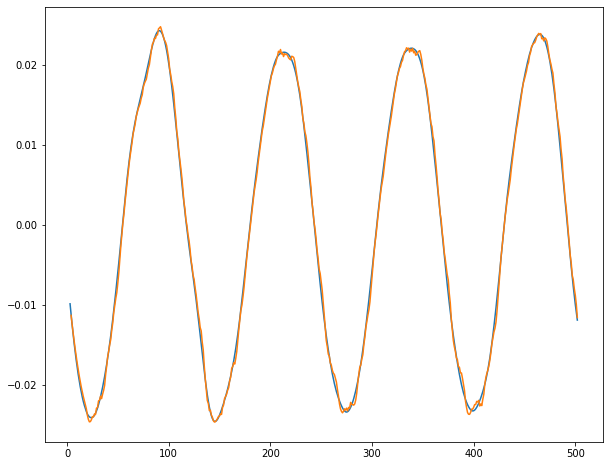

In [9]:
plt.figure(figsize=(10, 8))
plt.plot(df["ay_dot"].iloc[:500])
plt.plot((df["ay"] - df["ay"].shift(1)).iloc[:500]/mean_dt)

In [10]:
df.columns

Index(['datetime', 'ax', 'ay', 'bx', 'by', 'f_ax', 'f_ay', 'f_bx', 'f_by',
       'ax_dot', 'ax_dot2', 'ay_dot', 'ay_dot2', 'bx_dot', 'bx_dot2', 'by_dot',
       'by_dot2', 'f_ax_dot', 'f_ax_dot2', 'f_ay_dot', 'f_ay_dot2', 'f_bx_dot',
       'f_bx_dot2', 'f_by_dot', 'f_by_dot2'],
      dtype='object')

In [11]:
q = np.expand_dims(df[['ax', 'ay', 'bx', 'by']].values, axis=-1)
q_dot = np.expand_dims(df[['ax_dot', 'ay_dot', 'bx_dot', 'by_dot']].values, axis=-1)
q_dot2 = np.expand_dims(df[['ax_dot2', 'ay_dot2', 'bx_dot2', 'by_dot2']].values, axis=-1)
f = np.expand_dims(df[['f_ax', 'f_ay', 'f_bx', 'f_by']].values, axis=-1)

In [12]:
q_dot

array([[[-0.00337567],
        [-0.00986513],
        [-0.00915919],
        [-0.00611813]],

       [[-0.00311108],
        [-0.01119435],
        [-0.00851867],
        [-0.00752944]],

       [[-0.00285801],
        [-0.01245823],
        [-0.00789393],
        [-0.00886671]],

       ...,

       [[-0.00163534],
        [-0.00741774],
        [-0.00701462],
        [-0.00781845]],

       [[-0.00155942],
        [-0.00886686],
        [-0.00723152],
        [-0.00918279]],

       [[-0.00147518],
        [-0.01034264],
        [-0.00746066],
        [-0.01057538]]])

(0.0, 500.0)

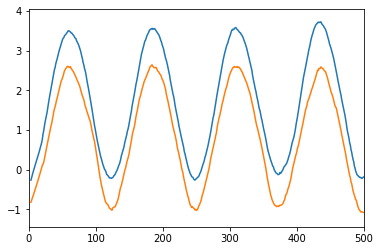

In [13]:
plt.plot(df["f_ay"])
plt.plot(df["f_by"])
plt.xlim((0, 500))

(0.0, 500.0)

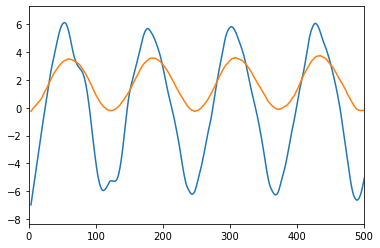

In [14]:
plt.plot(df["ay_dot2"])
plt.plot(df["f_ay"])
plt.xlim((0, 500))

In [15]:
# Treinamento

In [16]:
from jax import random
from jax.experimental.optimizers import adam, sgd
%load_ext autoreload
%autoreload 2
from models.newton import mse, initialize_params, get_batch_forward_pass, get_loss_function, train
from tqdm import tqdm

from utils import Shuffler

rng = random.PRNGKey(20)

/home/felipeangelim/.local/lib/python3.8/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [17]:
params = initialize_params(rng, dims=4)
batch_forward_pass = get_batch_forward_pass(mass=[[]])

NameError: name 'm_matrix' is not defined

In [114]:

shuffler = Shuffler(len(q))
q_shuffled = shuffler.shuffle(q)
q_dot_shuffled = shuffler.shuffle(q_dot)
q_dot2_shuffled = shuffler.shuffle(q_dot2)
f_shuffled = shuffler.shuffle(f)

In [115]:
params

[DeviceArray([[-0.6630825 , -0.5782476 ],
              [ 0.20764129,  0.9427113 ]], dtype=float32),
 DeviceArray([[-1.4662489 , -0.8464475 ],
              [ 0.6290237 ,  0.26404384]], dtype=float32)]

  0%|          | 0/390 [00:00<?, ?it/s]

Epoch 0


100%|██████████| 390/390 [00:03<00:00, 114.48it/s]


Epoch 0 , mean error: 5194.824 params: [DeviceArray([[-0.00418434,  1.9978281 ],
             [-1.9603438 ,  2.0206947 ]], dtype=float32), DeviceArray([[ 1.9977301,  7.005305 ],
             [-6.9549713,  6.949872 ]], dtype=float32)]


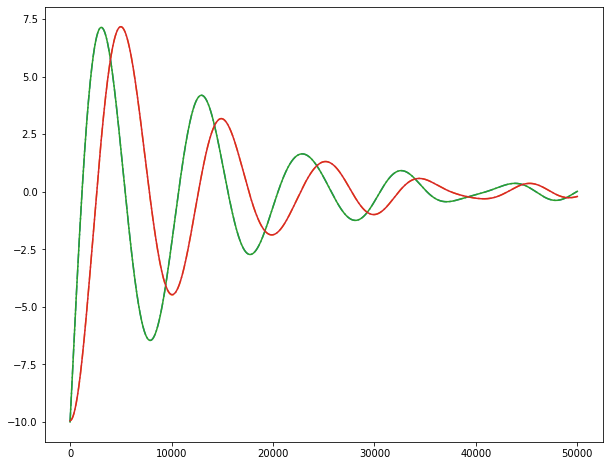

  2%|▏         | 6/390 [00:00<00:06, 55.69it/s]

Epoch 1


100%|██████████| 390/390 [00:05<00:00, 77.30it/s] 


Epoch 1 , mean error: 2.3571342e-06 params: [DeviceArray([[-1.3293483e-03,  1.9993263e+00],
             [-1.9993566e+00,  2.0003271e+00]], dtype=float32), DeviceArray([[ 2.0009494,  7.001546 ],
             [-6.9974756,  7.0005555]], dtype=float32)]


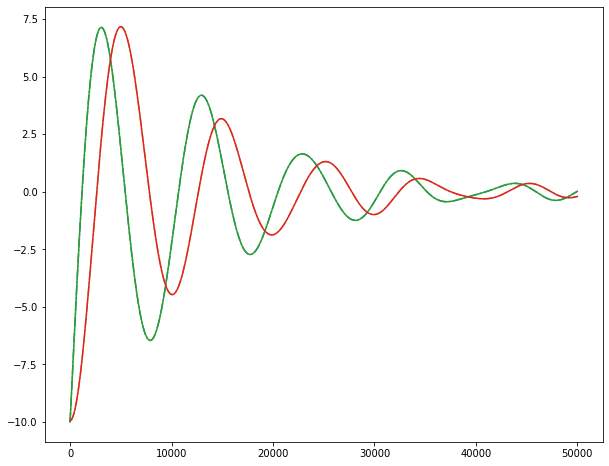

  2%|▏         | 8/390 [00:00<00:04, 79.84it/s]

Epoch 2


 54%|█████▍    | 210/390 [00:03<00:02, 69.71it/s]


KeyboardInterrupt: 

In [116]:


def callback(y_pred, y_true):
    
    plt.figure(figsize=(10, 8))
    plt.plot(shuffler.undo_shuffle(np.squeeze(y_pred)), linestyle="-.")
    plt.plot(shuffler.undo_shuffle(np.squeeze(y_true)))
    plt.show()


train(params, q_shuffled, q_dot_shuffled, q_dot2_shuffled, f_shuffled, batch_size=128, optimizer=adam, step_size=1e2, epochs=10, callback=callback, batch_forward_pass=batch_forward_pass)